# Curse of dimensionality

In this notebook, we will :
- explore the propeties of curse of dimensionality
- Explain why euclidian norm doesn't work in high dimentionality

In [162]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

## Property 1: Points move far away from each other in high dimensions. This means the density of data in local neighborhoods is too sparse to fit distributions.

## Distribution de Bernouilli:

En théorie des probabilités, la loi de Bernoulli, désigne la loi de probabilité d'une variable aléatoire discrète qui prend la valeur $1$ avec la probabilité $p$ et $0$ avec la probabilité $q = 1 – p$.

$$P(X=x) = \begin{cases} p & \text{si x = 1} \\ 1 - p & \text{si x = 0} \\ 0 & \text{sinon}  \end{cases}$$
$$P(X=x) = p^x(1 - p)^{1-x}$$ 

Soit $X$ la VA de Bernouilli:
- Son espérance vaut : $p$
- Sa variance vaut : $p(1 – p)$

Exemple: Pile ou face.

In [63]:
bernouilli_distribution = lambda x, p:  p**x * (1 - p)**(1 - x)

## Euclidian distance

The Euclidean distance between two points $i$, $j$ over two dimensions $p = 2$ is :

$$d_{p=2}(s_1, s_2) = \sqrt{(x_{i, 1} - x_{j, 1})^2 + (x_{i, 2} - x_{j, 2})^2}$$

$$d_{p}(s_1, s_2) = \sqrt{(x_{i, 1} - x_{j, 1})^2 + ...  + (x_{i, p} - x_{j, p})^2}$$

As the number of dimensions increases, the distance increases, too.

$$d_{1} < d_{2} < d_{3} < ... < d_{p} = \lim\limits_{p \to \infty} d_{p} = +\infty$$


At high dimensions, **Euclidean distance** loses pretty much all meaning. ...
Basically once you get up to high-dimensionality, pairwise distance between all of your points approaches a constant.

In [144]:
euclidian_distance = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

In [145]:
# Test
x1, x2 = np.array([1, 1]), np.array([2, 2])
euclidian_distance(x1, x2)

1.4142135623730951

 ## Generate 2d data
 
Create data from uniform distribution over [0, 1]

In [180]:
def display_random_data(data):
    """ Display random data"""
    plt.scatter(data[:, 0], data[:, 1])
    plt.title("Random data")
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.show()

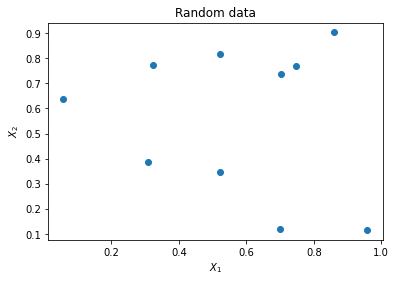

In [146]:
# Generate data
n_samples, features = 10, 2 # dim

X = np.random.rand(n_samples, features)

# Display data
display_random_data(X)

The average pairwise distance between pair points in 2D is $0.52$.

In [149]:
features = 2 # dim
distances = []

for n_samples in [300, 400, 500]:
    X = np.random.rand(n_samples, features)
    distances.append([n_samples, np.mean([euclidian_distance(x1, x2) 
                                      for i, x1 in enumerate(X) 
                                          for j, x2 in enumerate(X) if i != j])])  
print(distances)
np.array(distances)[:, 1].mean()

[[300, 0.5346395426013444], [400, 0.5115160202802742], [500, 0.5268730720932521]]


0.524342878324957

What happens to the average distance between points and the origin as we increase the dimension $n$

In [181]:
n_samples = 100
distances = []

for feature in tqdm([2, 10**1, 10**2, 10**3, 10**4, 10**5]):
    X = np.random.rand(n_samples, feature)
    distances.append([feature, np.mean([euclidian_distance(x1, x2) 
                                      for i, x1 in enumerate(X) 
                                          for j, x2 in enumerate(X) if i != j])])  
distances

100%|██████████| 6/6 [00:02<00:00,  2.16it/s]


[[2, 0.5292171219997266],
 [10, 1.2650319781573516],
 [100, 4.050566569755746],
 [1000, 12.903359445404568],
 [10000, 40.81831265110514],
 [100000, 129.1169191241911]]

Text(0, 0.5, 'Average Euclidian distance')

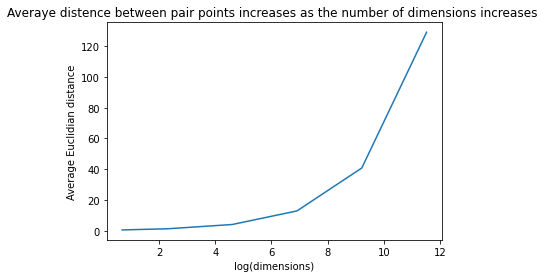

In [182]:
plt.plot(np.log(np.array(distances)[:, 0]), np.array(distances)[:, 1])
plt.title("Averaye distence between pair points increases as the number of dimensions increases ")
plt.xlabel("log(dimensions)")
plt.ylabel("Average Euclidian distance")

## 2. Points move far away from the center in high dimensions. This means the data is moving away from the center and heading towards the outer edge of the space

Below is the plot of the average distance between the points and the origin for each n-ball.

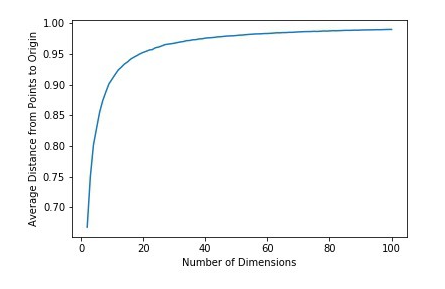

We can see that the average distance from randomly selected points to the origin increases rapidly as we increase the dimension $n$.

Dimension |Average distance from points to the origin 
----------|-----------------------------------------
2-ball    | 0.67
3-ball    | 0.75
10-ball   | 0.91
20-ball   | 0.95
100-ball  | 0.99
